In [21]:
import pandas as pd
import numpy as np

In [22]:
# 1. EDA

In [23]:
df = pd.read_csv('mental_health_dataset.csv',engine='python')
df.head() # See the top 5 rows of the dataframe

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mood_Description,Sentiment_Score,Mental_Health_Status
0,1,23,Other,2.52,5,20,6,Onto foreign do environmental anyone every nea...,6.8,4166,Happy,0.0000,2
1,2,19,Male,2.74,5,3,7,Party but others visit admit industry country ...,5.1,4949,Tired,0.4678,2
2,3,21,Female,3.53,5,11,24,Religious sure wait do chance decade according...,8.3,7632,Sad,0.5106,2
3,4,18,Male,2.04,4,15,14,A task effect entire coach join series.,8.2,5548,Sad,0.2960,2
4,5,19,Other,2.87,1,2,4,Knowledge several camera wait week write quali...,5.9,3698,Happy,0.4588,0


In [24]:
# What are the data types for each column
df.dtypes

Student_ID                int64
Age                       int64
Gender                   object
GPA                     float64
Stress_Level              int64
Anxiety_Score             int64
Depression_Score          int64
Daily_Reflections        object
Sleep_Hours             float64
Steps_Per_Day             int64
Mood_Description         object
Sentiment_Score         float64
Mental_Health_Status      int64
dtype: object

In [25]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'GPA', 'Stress_Level', 'Anxiety_Score',
       'Depression_Score', 'Daily_Reflections', 'Sleep_Hours', 'Steps_Per_Day',
       'Mood_Description', 'Sentiment_Score', 'Mental_Health_Status'],
      dtype='object')

In [26]:
df.describe()

,Student_ID,Age,GPA,Stress_Level,Anxiety_Score,Depression_Score,Sleep_Hours,Steps_Per_Day,Sentiment_Score,Mental_Health_Status
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,20.366000,2.810940,3.062000,9.812000,13.618000,6.06440,6067.008000,0.186588,1.638000
std,144.481833,2.272967,0.513825,1.431872,6.345486,8.316153,1.52404,1974.215196,0.367707,0.565328
min,1.000000,17.000000,1.290000,1.000000,0.000000,0.000000,3.00000,2000.000000,-0.859100,0.000000
25%,125.750000,18.000000,2.460000,2.000000,4.000000,6.000000,5.00000,4700.250000,0.000000,1.000000
50%,250.500000,20.000000,2.790000,3.000000,10.000000,14.000000,6.15000,6019.000000,0.190100,2.000000
75%,375.250000,22.000000,3.190000,4.000000,15.000000,21.000000,7.10000,7447.750000,0.493900,2.000000
max,500.000000,24.000000,4.000000,5.000000,21.000000,27.000000,9.00000,12000.000000,0.921700,2.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            500 non-null    int64  
 1   Age                   500 non-null    int64  
 2   Gender                500 non-null    object 
 3   GPA                   500 non-null    float64
 4   Stress_Level          500 non-null    int64  
 5   Anxiety_Score         500 non-null    int64  
 6   Depression_Score      500 non-null    int64  
 7   Daily_Reflections     500 non-null    object 
 8   Sleep_Hours           500 non-null    float64
 9   Steps_Per_Day         500 non-null    int64  
 10  Mood_Description      500 non-null    object 
 11  Sentiment_Score       500 non-null    float64
 12  Mental_Health_Status  500 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 50.9+ KB


In [28]:
# Check the number of null values per column
df.isnull().sum()


Student_ID              0
Age                     0
Gender                  0
GPA                     0
Stress_Level            0
Anxiety_Score           0
Depression_Score        0
Daily_Reflections       0
Sleep_Hours             0
Steps_Per_Day           0
Mood_Description        0
Sentiment_Score         0
Mental_Health_Status    0
dtype: int64

In [29]:
# Remove dupliate (if there exists)
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [30]:
df.head(10)

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mood_Description,Sentiment_Score,Mental_Health_Status
0,1,23,Other,2.52,5,20,6,Onto foreign do environmental anyone every nea...,6.8,4166,Happy,0.0000,2
1,2,19,Male,2.74,5,3,7,Party but others visit admit industry country ...,5.1,4949,Tired,0.4678,2
2,3,21,Female,3.53,5,11,24,Religious sure wait do chance decade according...,8.3,7632,Sad,0.5106,2
3,4,18,Male,2.04,4,15,14,A task effect entire coach join series.,8.2,5548,Sad,0.2960,2
4,5,19,Other,2.87,1,2,4,Knowledge several camera wait week write quali...,5.9,3698,Happy,0.4588,0
5,6,23,Other,2.99,2,3,24,Bank answer speak expert drug reveal its reaso...,5.1,5416,Tired,0.0000,2
6,7,20,Other,3.19,4,7,14,Field watch drug democratic foreign summer dir...,4.3,5227,Happy,0.0000,1
7,8,18,Other,2.22,4,1,5,These lot dinner able miss tell pressure avail...,6.5,3213,Anxious,0.1027,1
8,9,21,Male,3.17,4,7,20,History degree administration party Republican...,6.3,3042,Happy,0.7351,2
9,10,21,Male,2.44,2,12,8,Political blood book commercial win speech air...,4.7,4973,Sad,0.5859,1


In [31]:
df['Gender'] = df['Gender'].astype('category')
df.drop(['Mood_Description', 'Sentiment_Score'], axis=1, inplace=True)



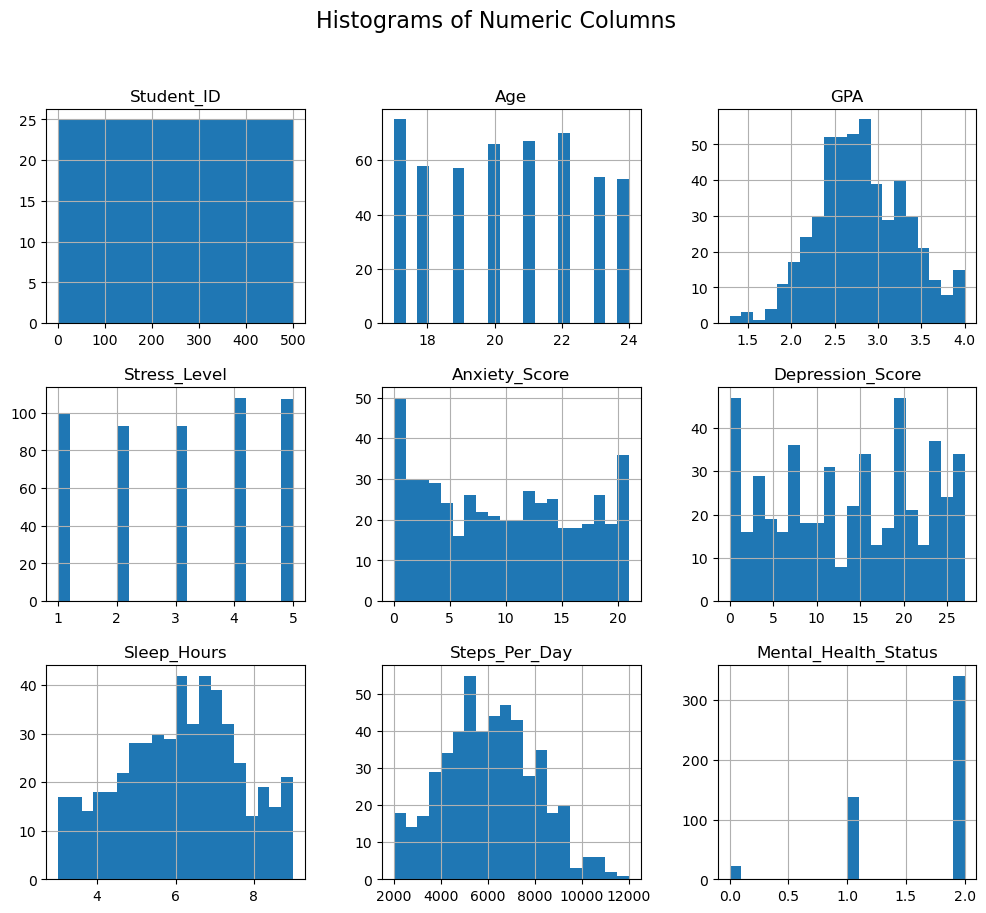

In [32]:
# Explore Distributions & Spot Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms
df[numeric_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.show()


In [33]:
# Detect outliers
from scipy.stats import zscore

outliers = pd.DataFrame()
for col in numeric_cols:
    z = zscore(df[col])
    outliers_in_col = df[(abs(z) > 3)]
    if not outliers_in_col.empty:
        outliers = pd.concat([outliers, outliers_in_col])

outliers.drop_duplicates(inplace=True)
print(outliers)
# Since this outlier is not an error, we will keep it

    Student_ID  Age Gender   GPA  Stress_Level  Anxiety_Score  \
35          36   24   Male  2.24             3             16   

    Depression_Score                                  Daily_Reflections  \
35                 0  Say dream teacher decade quality size while re...   

    Sleep_Hours  Steps_Per_Day  Mental_Health_Status  
35          7.0          12000                     2  


In [40]:
df.head()

,Student_ID,Age,Gender,GPA,Stress_Level,Anxiety_Score,Depression_Score,Daily_Reflections,Sleep_Hours,Steps_Per_Day,Mental_Health_Status
0,1,23,Other,2.52,5,20,6,Onto foreign do environmental anyone every nea...,6.8,4166,2
1,2,19,Male,2.74,5,3,7,Party but others visit admit industry country ...,5.1,4949,2
2,3,21,Female,3.53,5,11,24,Religious sure wait do chance decade according...,8.3,7632,2
3,4,18,Male,2.04,4,15,14,A task effect entire coach join series.,8.2,5548,2
4,5,19,Other,2.87,1,2,4,Knowledge several camera wait week write quali...,5.9,3698,0
